In [2824]:
import pandas as pd

In [2825]:
df = pd.read_csv('data\students.csv')
df.head()

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Social network duration min,Chocolate,City population,Strange people,Your insitute,Brother-sister,Plane seat,MIddle and index finger,Middle and ring finger,Middle and little finger
0,20,170,40,2,2002,100,85,86,0,84,...,45,Сникерс,800000.0,Экономический,Математический и ИТ,нет ни брата ни сестры,У окна (пардон: у иллюминатора),20,10.0,40.0
1,22,191,43,7,2000,307,69,74,64,72,...,180,КитКат,800000.0,Математический и ИТ,Математический и ИТ,есть и брат и сестра,В середине,5,5.0,20.0
2,21,172,41,4,2000,186,78,62,0,0,...,90,КитКат,770000.0,Педагогический,Другое,есть брат,У окна (пардон: у иллюминатора),13,10.0,26.0
3,19,168,38,2,2003,604,72,0,0,0,...,200,Баунти,900000.0,СоцГум,Юридический,есть сестра,У окна (пардон: у иллюминатора),12,13.5,35.0
4,23,159,36,1,1998,144,0,0,0,0,...,400,Баунти,860000.0,Педагогический,Педагогический,есть сестра,У окна (пардон: у иллюминатора),10,11.0,22.0


In [2826]:
df.iloc[12]['Growth']

169

In [2827]:
df.iloc[len(df) - 18]['Growth']

161

In [2828]:
len(df.loc[df['Rock paper scissors'] == 'Ножницы'])

88

In [2829]:
max_val = df['Rock paper scissors'].max()
print(f'Чаще выбирают: {max_val}')
win_conditions = {'Камень': 'Бумага', 'Ножницы': 'Камень', 'Бумага': 'Ножницы'}
win_conditions.get(max_val)

Чаще выбирают: Ножницы


'Камень'

In [2830]:
df.iloc[9][['Weight', 'Sex']]

Weight       58.0
Sex       женский
Name: 9, dtype: object

In [2831]:
df.loc[df['Weight'] == df['Weight'].max()]['Growth']

7    180
Name: Growth, dtype: int64

In [2832]:
df[df['Friend number'] == 0 ].value_counts(['Sex'])

Sex    
женский    1
мужской    1
Name: count, dtype: int64

In [2833]:
round((len(df[(df['Animal'] == 'Собак') & (df['Floor number'] == 1)]) / len(df[df['Animal'] == 'Собак'])) * 100)

12

In [2834]:
single_child = df.loc[df['Brother-sister'] == 'нет ни брата ни сестры']
not_single_child = df.loc[df['Brother-sister'] != 'нет ни брата ни сестры']
single_child['Social network duration min'].median() - not_single_child['Social network duration min'].median()

60.0

In [2835]:
df_weight_fastfood = df[['Fastfood', 'Weight']].groupby('Fastfood').agg({'Weight': 'mean'})
df_weight_fastfood

,Weight
Fastfood,
KFC,66.859155
Бургер кинг,64.217391
Макдональдс (или как он там сейчас называется?),58.800000


In [2836]:
df_weight_fastfood.loc['KFC'] - df_weight_fastfood.loc['Макдональдс (или как он там сейчас называется?)']

Weight    8.059155
dtype: float64

In [2837]:
df_cut = df[['Year of birth', 'Growth', 'Weight', 'Hair length', 'Shoe size']]
df_cut.sort_values('Shoe size', ascending=False).reset_index(drop=True)['Year of birth'].iloc[2]

2002

In [2838]:
df_cut.sort_values('Shoe size', ascending=False).iloc[2,0]

2002

In [2839]:
df_cut.sort_values(['Shoe size', 'Growth'], ascending=[False, True]).iloc[1,0]

2003

In [2840]:
df_cut['Full length'] = df_cut[['Growth', 'Hair length']].sum(axis=1)
df_cut['Full length'].max()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\1536865746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Full length'] = df_cut[['Growth', 'Hair length']].sum(axis=1)


319.0

In [2841]:
round(df_cut['Growth'].corr(df_cut['Shoe size']), 2)

0.86

In [2842]:
display(df.groupby('Glasses')[['Russian rating', 'Maths rating']].mean())
df.groupby('Glasses')[['Russian rating', 'Maths rating']].mean().loc['простите. не увидел(а) вопроса ))))', 'Maths rating'].round(1)

,Russian rating,Maths rating
Glasses,,
да,83.388235,56.741176
нет,80.471910,59.955056
простите. не увидел(а) вопроса )))),77.900000,54.700000


54.7

In [2843]:
display(df.groupby('Rock paper scissors')[['Russian rating', 'Maths rating']].mean())
df.groupby('Rock paper scissors')[['Russian rating', 'Maths rating']].mean().loc['Бумага', 'Maths rating'].round(2)

,Russian rating,Maths rating
Rock paper scissors,,
Бумага,76.473684,52.894737
Камень,81.450000,62.166667
Ножницы,83.988636,57.738636


52.89

In [2844]:
df['Children number'].isna().sum()

36

In [2845]:
females = df.loc[df['Sex'] == 'женский']
males = df.loc[df['Sex'] == 'мужской']
females['Weight'] = females['Weight'].fillna(females['Weight'].mean())
males['Weight'] = males['Weight'].fillna(males['Weight'].mean())
df_new = pd.concat([females, males])
df_new['Weight'].mean()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\770029833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  females['Weight'] = females['Weight'].fillna(females['Weight'].mean())
C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\770029833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  males['Weight'] = males['Weight'].fillna(males['Weight'].mean())


63.53201161071252

In [2846]:
df_new = df.copy()

df_new.loc[(df_new.Sex=='женский'), 'Weight'] = df_new.loc[(df_new.Sex=='женский'), 'Weight'].fillna(df_new.loc[(df_new.Sex=='женский'), 'Weight'].mean())
df_new.loc[(df_new.Sex=='мужской'), 'Weight'] = df_new.loc[(df_new.Sex=='мужской'), 'Weight'].fillna(df_new.loc[(df_new.Sex=='мужской'), 'Weight'].mean())

df_new['Weight'].mean()

63.53201161071252

In [2847]:
singles = df.loc[df['Brother-sister'] == 'нет ни брата ни сестры' ]
sublings = df.loc[df['Brother-sister'] != 'нет ни брата ни сестры' ]
singles['Children number'] = singles['Children number'].fillna(singles['Children number'].median())
sublings['Children number'] = sublings['Children number'].fillna(sublings['Children number'].median())
df_new = pd.concat([singles, sublings])
df_new['Children number'].median()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\1188050179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singles['Children number'] = singles['Children number'].fillna(singles['Children number'].median())
C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\1188050179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sublings['Children number'] = sublings['Children number'].fillna(sublings['Children number'].median())


2.0

In [2848]:
df.groupby(df['Brother-sister'] != 'нет ни брата ни сестры')['Children number'].apply(lambda x: x.fillna(x.median())).median()

2.0

In [2849]:
iqr = df['Putin age'].quantile(0.75) - df['Putin age'].quantile(0.25)
low, hight = df['Putin age'].quantile(0.25) - 1.5 * iqr, df['Putin age'].quantile(0.75) + 1.5 * iqr
low, hight

(62.5, 74.5)

In [2850]:
df_new = df.copy()

print(len(df_new.loc[(df_new['Putin age'] > low) & (df_new['Putin age'] < hight)]))
print(df_new.loc[(df_new['Putin age'] > low) & (df_new['Putin age'] < hight)]['Putin age'].median())

148
69.0


# 3.4  Кластеризация

In [2851]:
import seaborn as sns
from sklearn.cluster import KMeans

In [2852]:
# Кластеризация по росту и весу

In [2853]:
df_new = df[['Weight', 'Growth', 'Sex']]
df_cut = df_new.dropna()
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_cut[['Weight', 'Growth']])
df_cut['Clusters'] = kmeans.labels_

c:\Users\kuche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\4055670114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Clusters'] = kmeans.labels_


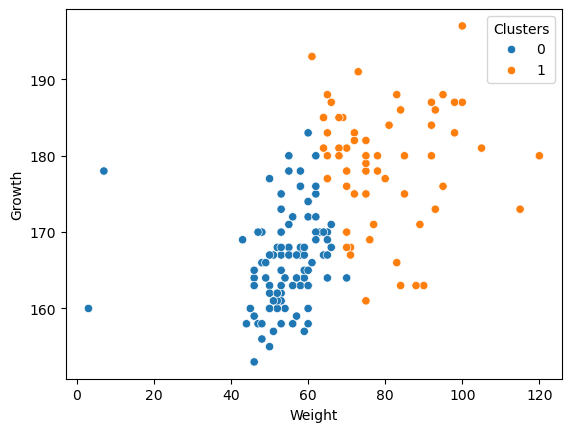

In [2854]:
sns.scatterplot(df_cut, x='Weight', y='Growth', hue='Clusters');

In [2855]:
df_cut.head()

,Weight,Growth,Sex,Clusters
0,64.0,170,женский,0
1,73.0,191,мужской,1
2,60.0,172,мужской,0
3,59.0,168,женский,0
4,57.0,159,женский,0


<Axes: xlabel='Weight', ylabel='Growth'>

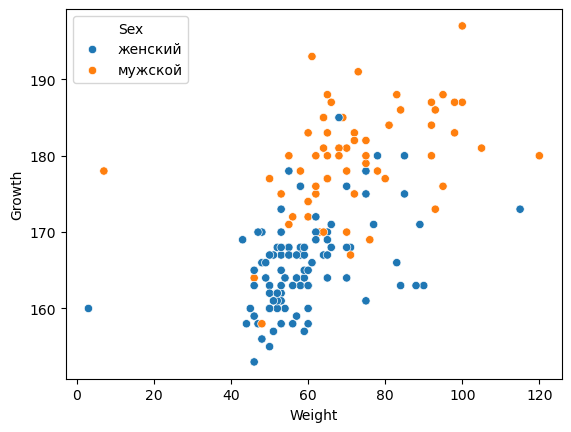

In [2856]:
sns.scatterplot(df_cut, x='Weight', y='Growth', hue='Sex')

In [2857]:
# Кластеризация по размеру обуви и весу    

In [2858]:
df_new = df[['Shoe size', 'Weight', 'Sex']]
df_cut = df_new.dropna()
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_cut[['Weight', 'Shoe size']])
df_cut['Clusters'] = kmeans.labels_

c:\Users\kuche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\4140103915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Clusters'] = kmeans.labels_


In [2859]:
df_cut.head()

,Shoe size,Weight,Sex,Clusters
0,40,64.0,женский,0
1,43,73.0,мужской,1
2,41,60.0,мужской,0
3,38,59.0,женский,0
4,36,57.0,женский,0


In [2860]:
len(df_cut.loc[(df_cut['Sex'] == 'мужской') & (df_cut['Clusters'] == 0)])

31

# 4.1 Задача предсказания и регрессия

In [2861]:
from sklearn.linear_model import LinearRegression

In [2862]:
df_cut = df[['Growth', 'Shoe size']]
df_cut = df_cut.dropna()

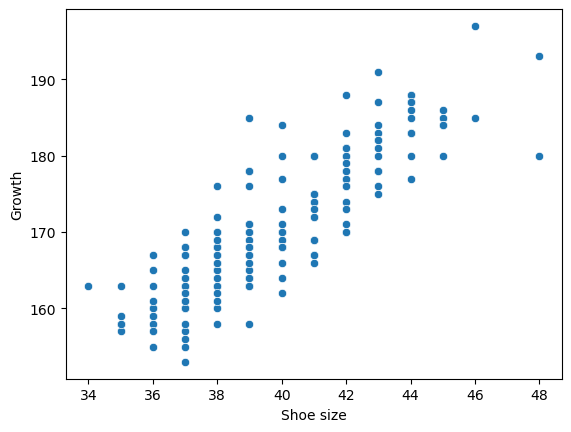

In [2863]:
sns.scatterplot(df_cut, x='Shoe size', y='Growth');

In [2864]:
logreg = LinearRegression()
results = logreg.fit(df_cut['Shoe size'].values.reshape(-1, 1), y=df_cut['Growth'])

In [2865]:
# df_cut['Shoe size'].values.reshape(-1, 1)

In [2866]:
# growth = a * shoe_size + b
# growth = 2.77717058 * shoe_size + 60.365811257367284

print(f'a = {results.coef_[0]}, b = {results.intercept_}')

a = 2.777170584287218, b = 60.3658112573673


In [2867]:
# Предсказание роста
df_cut['Predicted growth'] = results.predict(df_cut['Shoe size'].values.reshape(-1, 1))

In [2868]:
df_cut.head()

,Growth,Shoe size,Predicted growth
0,170,40,171.452635
1,191,43,179.784146
2,172,41,174.229805
3,168,38,165.898293
4,159,36,160.343952


In [2869]:
# Ошибка предсказания (средняя абсолютная ошибка)
from sklearn.metrics import mean_absolute_error

In [2870]:
mean_absolute_error(df_cut['Growth'], df_cut['Predicted growth'])

3.450698681998387

In [2871]:
df_cut = df[['Age','Year of birth', 'Month of birthday']]

In [2872]:
logreg = LinearRegression()
results = logreg.fit(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2), y=df_cut['Age'])

In [2873]:
df_cut['Prediction Age'] = results.predict(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2))
df_cut.head()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\183436484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Prediction Age'] = results.predict(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2))


,Age,Year of birth,Month of birthday,Prediction Age
0,20,2002,6,20.618535
1,22,2000,4,20.421326
2,21,2000,8,20.821561
3,19,2003,1,20.116787
4,23,1998,12,21.224704


In [2874]:
df = pd.read_csv('data\students_test.csv')
df_cut = df[['Age','Year of birth', 'Month of birthday']]

In [2875]:
df_cut['Prediction Age'] = results.predict(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2))
df_cut.head()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\183436484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Prediction Age'] = results.predict(df_cut[['Year of birth', 'Month of birthday']].values.reshape(-1, 2))


,Age,Year of birth,Month of birthday,Prediction Age
0,22,2000,6,20.621444
1,20,2002,3,20.318359
2,21,2001,6,20.619989
3,21,2001,7,20.720048
4,22,2000,5,20.521385


In [2876]:
mean_absolute_error(df_cut['Age'], df_cut['Prediction Age'])

1.605496000066093

# 4.2 Алгоритмы классификации

In [2877]:
df_cut = df[['Growth', 'Weight', 'Sex']]
df_cut = df_cut.dropna()

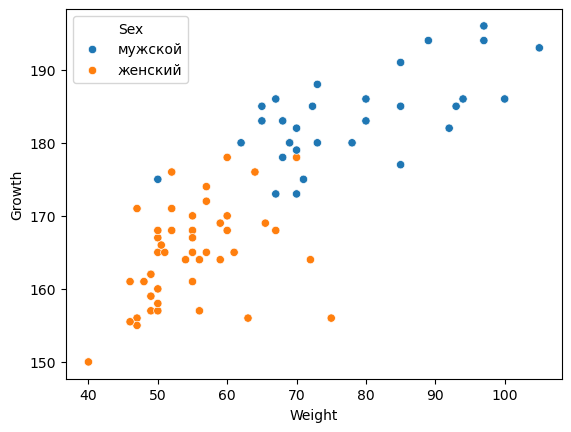

In [2878]:
sns.scatterplot(df_cut, x='Weight', y='Growth', hue='Sex');

In [2879]:
# Нормализация
from sklearn.preprocessing import StandardScaler

In [2880]:
scaler = StandardScaler()
# Обучение нормировщика
scaler.fit(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))
# Подача данный обученному нормировщику
arr = scaler.transform(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))

In [2881]:
# Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(arr, y=df_cut['Sex'].values)

KNeighborsClassifier(n_neighbors=1)

In [2882]:
df_test = pd.read_csv('data\students_test.csv')
df_test_cut = df_test[['Weight', 'Growth', 'Sex']]
df_test_cut = df_test_cut.dropna()

In [2883]:
arr_test = scaler.transform(df_test_cut[['Weight', 'Growth']].values.reshape(-1, 2)) 
df_test_cut['Predict_Sex'] = model.predict(arr_test)
df_test_cut.head()

,Weight,Growth,Sex,Predict_Sex
0,78.0,180.0,мужской,мужской
1,50.0,167.0,женский,женский
2,70.0,178.0,женский,женский
3,47.0,156.0,женский,женский
4,94.0,186.0,мужской,мужской


In [2884]:
# Матрица сопряженности (матрица ошибок)

pd.crosstab(df_test_cut['Predict_Sex'], df_test_cut['Sex'])

Sex,женский,мужской
Predict_Sex,,
женский,47,1
мужской,0,29


In [2885]:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской')&(df_test_cut['Predict_Sex']=='женский'), 'Code'] = '1'
df_test_cut.loc[(df_test_cut['Sex']=='женский')&(df_test_cut['Predict_Sex']=='мужской'), 'Code'] = '2'

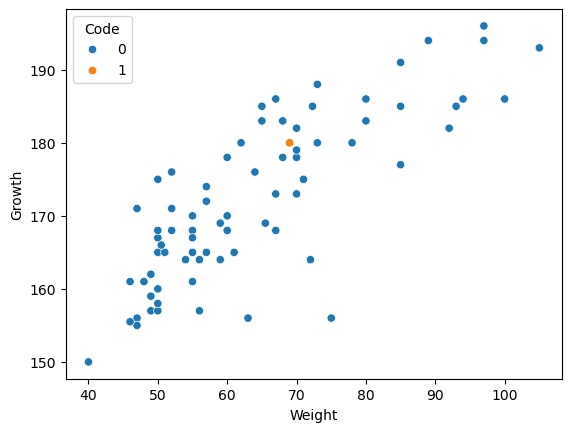

In [2886]:
sns.scatterplot(data=df_test_cut, x ='Weight', y ='Growth', hue='Code');

In [2887]:
# Линейная классификация
from sklearn.linear_model import SGDClassifier

In [2888]:
df_cut = df[['Growth', 'Weight', 'Sex']]
df_cut = df_cut.dropna()

In [2889]:
scaler = StandardScaler()
scaler.fit(df_cut[['Growth', 'Weight']])
arr = scaler.transform(df_cut[['Growth', 'Weight']])

In [2890]:
model = SGDClassifier()
model.fit(arr, y=df_cut['Sex'])

SGDClassifier()

In [2891]:
df_test = pd.read_csv('data\students_test.csv')
df_test_cut = df_test[['Weight', 'Growth', 'Sex']]
df_test_cut = df_test_cut.dropna()

In [2892]:
arr_test = scaler.transform(df_test_cut[['Growth', 'Weight']])

In [2893]:
df_test_cut['Predict_Sex'] = model.predict(arr_test)

In [2894]:
df_test_cut.head()

,Weight,Growth,Sex,Predict_Sex
0,78.0,180.0,мужской,мужской
1,50.0,167.0,женский,женский
2,70.0,178.0,женский,мужской
3,47.0,156.0,женский,женский
4,94.0,186.0,мужской,мужской


In [2895]:
pd.crosstab(df_test_cut['Predict_Sex'], df_test_cut['Sex'])

Sex,женский,мужской
Predict_Sex,,
женский,45,4
мужской,2,26


In [2896]:
df_test_cut['Code']='верно предсказано'
df_test_cut.loc[(df_test_cut['Sex']=='мужской')&(df_test_cut['Predict_Sex']=='женский'), 'Code'] = 'ошибочно женский'
df_test_cut.loc[(df_test_cut['Sex']=='женский')&(df_test_cut['Predict_Sex']=='мужской'), 'Code'] = 'ошибочно мужской'

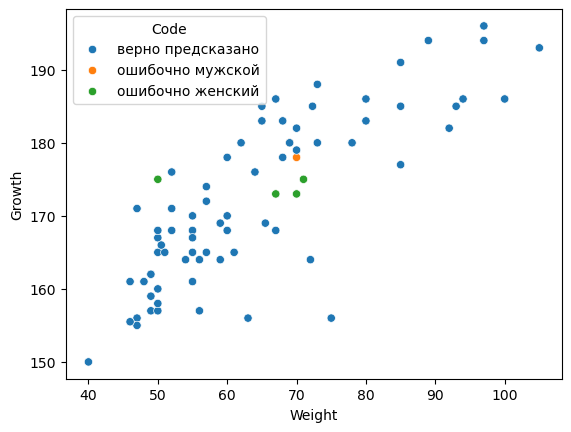

In [2897]:
sns.scatterplot(data=df_test_cut, x ='Weight', y ='Growth', hue='Code');

In [2898]:
# Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv
# Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler
# Запустите модель KNeighborsClassifier(n_neighbors=3), и получите предсказания для студентов из тестовой выборки students_test.csv
# С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.
# В отчет запишите количество студентов женского пола, которые были детектированы как женщины.

In [2899]:
df_cut = df[['Hair length','Shoe size', 'Sex']]

In [2900]:
scaler = StandardScaler()
scaler.fit(df_cut[['Hair length','Shoe size']])

StandardScaler()

In [2901]:
arr = scaler.transform(df_cut[['Hair length','Shoe size']])

In [2902]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(arr, y=df_cut['Sex'])

KNeighborsClassifier(n_neighbors=3)

In [2903]:
df_test = pd.read_csv('data/students_test.csv')
df_cut_test = df_test[['Hair length','Shoe size', 'Sex']]

In [2904]:
arr_test = scaler.fit_transform(df_test[['Hair length','Shoe size']])
df_cut_test['Predict_Sex'] = model.predict(arr_test)
df_cut_test.head()

C:\Users\kuche\AppData\Local\Temp\ipykernel_20072\1972158374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_test['Predict_Sex'] = model.predict(arr_test)


,Hair length,Shoe size,Sex,Predict_Sex
0,1.2,44.0,мужской,мужской
1,30.0,38.0,женский,женский
2,50.0,41.0,женский,женский
3,20.0,35.0,женский,женский
4,8.0,44.0,мужской,мужской


In [2905]:
pd.crosstab(df_cut_test['Sex'], df_cut_test['Predict_Sex'])

Predict_Sex,женский,мужской
Sex,,
женский,61,1
мужской,1,35


In [2906]:
# Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv
# Пронормируйте признаки 'Hair length','Shoe size' используя StandardScaler
# Запустите модель SGDClassifier(random_state=0) (нужно написать фразу random_state=0, чтобы у всех обучающихся был одинаковый ответ), 
# и получите предсказания для студентов из тестовой выборки students_test.csv
# С помощью команды pd.crosstab постройте матрицу ошибок (таблицу сопряженности) предсказанного и истинного пола студентов.
# В отчет запишите количество студентов мужского пола, которые были детектированы как мужчины.

In [2907]:
df = pd.read_csv('data\students.csv')
df_cut = df[['Hair length','Shoe size', 'Sex']]
df_cut = df_cut.dropna()

In [2908]:
scaler = StandardScaler()
arr = scaler.fit_transform(df_cut[['Hair length','Shoe size']])

In [2909]:
SGD_model = SGDClassifier(random_state=0)
SGD_model.fit(arr, y=df_cut['Sex'])

SGDClassifier(random_state=0)

In [2910]:
df_test = pd.read_csv('data\students_test.csv')
df_cut_test = df_test[['Hair length','Shoe size', 'Sex']]
df_cut_test = df_cut_test.dropna()

In [2911]:
arr_test = scaler.fit_transform(df_cut_test[['Hair length','Shoe size']])
df_cut_test['Predict_Sex'] = SGD_model.predict(arr_test)
df_cut_test.head()

,Hair length,Shoe size,Sex,Predict_Sex
0,1.2,44.0,мужской,мужской
1,30.0,38.0,женский,женский
2,50.0,41.0,женский,женский
3,20.0,35.0,женский,женский
4,8.0,44.0,мужской,мужской


In [2912]:
pd.crosstab(df_cut_test['Sex'], df_cut_test['Predict_Sex'])

Predict_Sex,женский,мужской
Sex,,
женский,61,1
мужской,1,35


# 5.1 Решающие деревья

In [2913]:
from sklearn import tree

In [2914]:
# Будем по признакам 'Hair length','Shoe size' предсказывать признак 'Sex'. Загрузите эти признаки из таблицы students.csv
# Запустите модель DecisionTreeClassifier, указав максимальную глубину дерева равную 2.

In [2915]:
df_cut.head()

,Hair length,Shoe size,Sex
0,50.0,40,женский
1,7.0,43,мужской
2,4.0,41,мужской
3,20.0,38,женский
4,55.0,36,женский


In [2916]:
tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(df_cut[['Hair length', 'Shoe size']], y=df_cut['Sex'])

DecisionTreeClassifier(max_depth=2)

In [2917]:
import graphviz

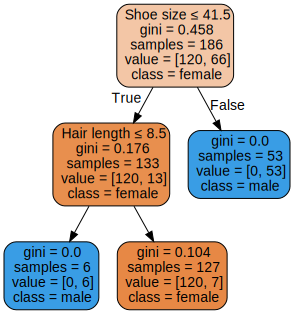

In [2918]:
dot_data = tree.export_graphviz(tree_model, out_file=None,
                                feature_names=['Hair length', 'Shoe size'],
                                class_names=['female', 'male'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

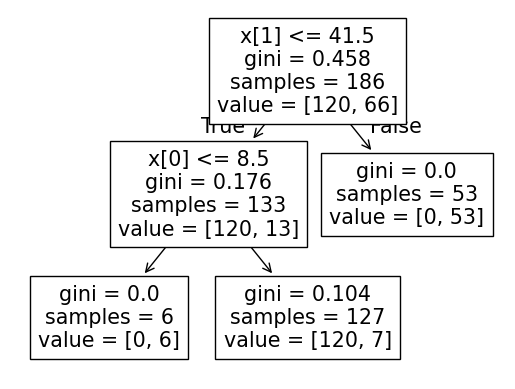

In [2919]:
tree.plot_tree(tree_model);

In [2920]:
df_cut_test = df_test[['Hair length', 'Shoe size', 'Sex']].dropna()
df_cut_test['Predict_Sex'] = tree_model.predict(df_cut_test[['Hair length', 'Shoe size']])

In [2921]:
df_cut_test.head()

,Hair length,Shoe size,Sex,Predict_Sex
0,1.2,44.0,мужской,мужской
1,30.0,38.0,женский,женский
2,50.0,41.0,женский,женский
3,20.0,35.0,женский,женский
4,8.0,44.0,мужской,мужской


In [2922]:
pd.crosstab(df_cut_test['Sex'], df_cut_test['Predict_Sex'])

Predict_Sex,женский,мужской
Sex,,
женский,61,1
мужской,2,34


In [2923]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_cut_test['Sex'], df_cut_test['Predict_Sex'])

(array([0.96825397, 0.97142857]),
 array([0.98387097, 0.94444444]),
 array([0.976     , 0.95774648]),
 array([62, 36], dtype=int64))

In [2924]:
# Будем по признакам 'Year of birth', 'Month of birthday' предсказывать признак 'Age'. Загрузите эти признаки из таблицы students.csv
# Запустите модель DecisionTreeRegressor, установив максимальную глубину дерева 3. Чему равно заштрихованное число в корне построенного дерева?

In [2925]:
df_cut = df[['Year of birth', 'Month of birthday', 'Age']].dropna()
df_cut.head()

,Year of birth,Month of birthday,Age
0,2002,6,20
1,2000,4,22
2,2000,8,21
3,2003,1,19
4,1998,12,23


In [2926]:
tree_model = tree.DecisionTreeRegressor(max_depth=3)
tree_model.fit(df_cut[['Year of birth', 'Month of birthday']], y=df_cut['Age'])

DecisionTreeRegressor(max_depth=3)

In [2927]:
df_cut_test = df_test[['Year of birth', 'Month of birthday', 'Age']].dropna()
df_cut_test['Predict_Age'] = tree_model.predict(df_cut_test[['Year of birth', 'Month of birthday']])
df_cut_test.head()

,Year of birth,Month of birthday,Age,Predict_Age
0,2000,6,22,21.032787
1,2002,3,20,19.636364
2,2001,6,21,21.032787
3,2001,7,21,21.032787
4,2000,5,22,21.032787


In [2928]:
pd.crosstab(df_cut_test['Age'], df_cut_test['Predict_Age'])

Predict_Age,18.466667,19.636364,21.032787,23.090909,25.000000,30.000000
Age,,,,,,
17,2,0,0,0,0,0
18,14,0,0,0,0,0
19,12,2,0,0,0,0
20,0,14,5,0,0,0
21,0,0,16,1,0,0
22,0,0,18,4,0,0
23,0,0,0,4,0,0
24,0,0,0,1,0,0
25,0,0,0,1,0,1


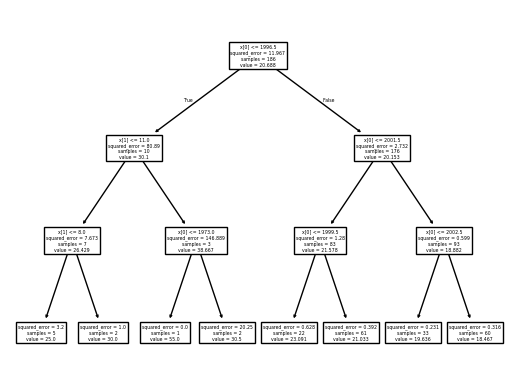

In [2929]:
tree.plot_tree(tree_model);

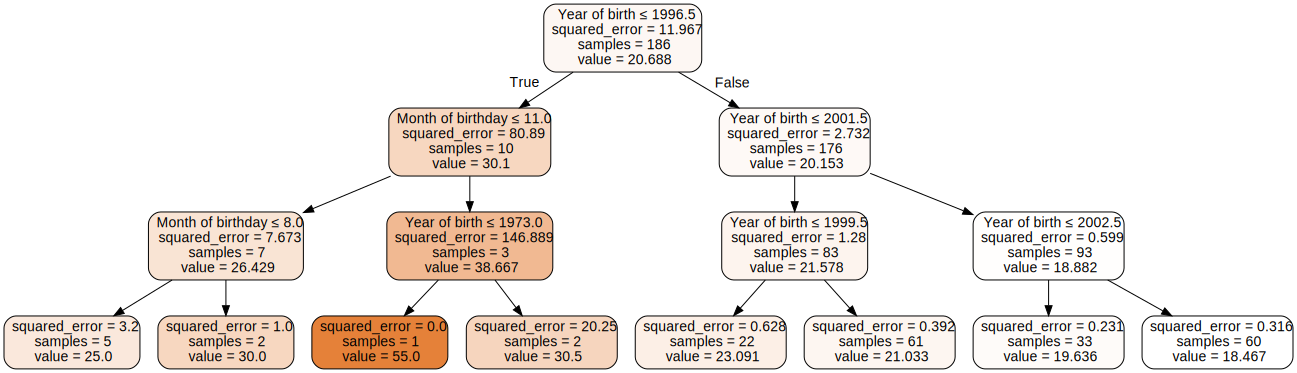

In [2930]:
dot_data = tree.export_graphviz(tree_model, out_file=None,
                                feature_names=['Year of birth', 'Month of birthday'],
                                class_names=['age'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [2931]:
from sklearn.metrics import mean_absolute_error

In [2932]:
mean_absolute_error(df_cut_test['Age'], df_cut_test['Predict_Age'])

0.7241329318612689

# 5.2 Бустинг и ансамбли алгоритмов

In [2933]:
from sklearn.ensemble import RandomForestClassifier

In [2934]:
df_cut = df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_cut = df_cut.dropna()

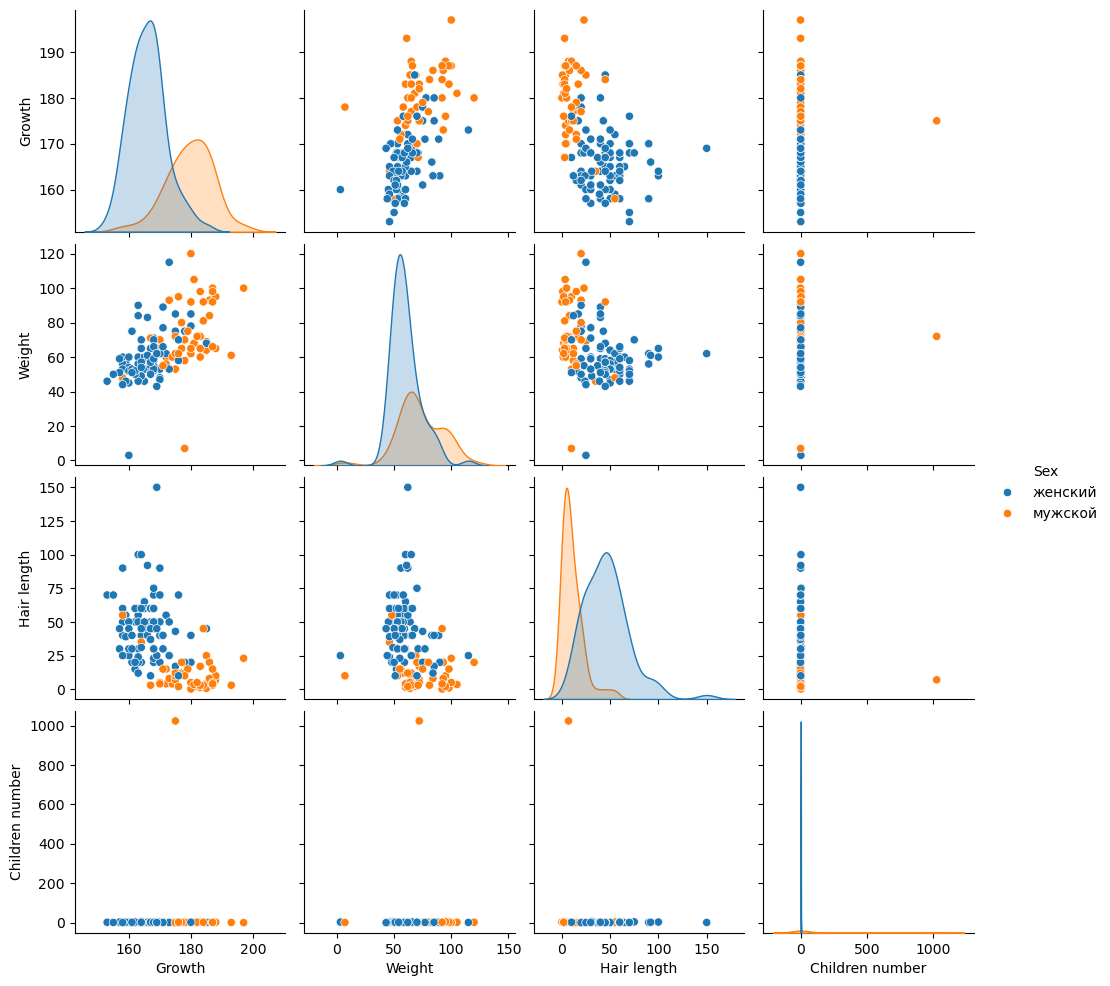

In [2935]:
sns.pairplot(df_cut, hue='Sex');

In [2936]:
rd_model = RandomForestClassifier(max_depth=2, random_state=0)
rd_model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number']], y=df_cut['Sex'])

RandomForestClassifier(max_depth=2, random_state=0)

In [2937]:
df_test_cut = df_test[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_test_cut = df_test_cut.dropna()

In [2938]:
df_test_cut['Predict_Sex'] = rd_model.predict(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number']])
df_test_cut.head()

,Growth,Weight,Sex,Hair length,Children number,Predict_Sex
0,180.0,78.0,мужской,1.2,2.0,мужской
1,167.0,50.0,женский,30.0,2.0,женский
3,156.0,47.0,женский,20.0,2.0,женский
5,150.0,40.0,женский,30.0,2.0,женский
7,183.0,80.0,мужской,2.0,0.0,мужской


In [2939]:
pd.crosstab(df_test_cut['Predict_Sex'], df_test_cut['Sex'])

Sex,женский,мужской
Predict_Sex,,
женский,42,1
мужской,0,25


In [2940]:
df_test_cut['Code']='верно предсказано'
df_test_cut.loc[(df_test_cut['Sex']=='мужской')&(df_test_cut['Predict_Sex']=='женский'), 'Code'] = 'ошибочно женский'
df_test_cut.loc[(df_test_cut['Sex']=='женский')&(df_test_cut['Predict_Sex']=='мужской'), 'Code'] = 'ошибочно мужской'

In [2941]:
df_test_cut['Code'].value_counts()

Code
верно предсказано    67
ошибочно женский      1
Name: count, dtype: int64

<Axes: xlabel='Weight', ylabel='Growth'>

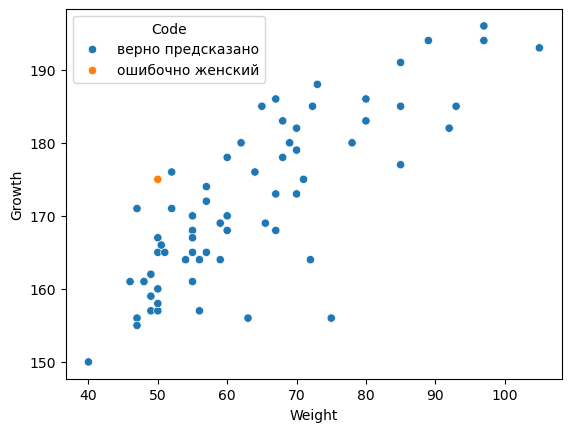

In [2942]:
sns.scatterplot(df_test_cut, x='Weight', y='Growth', hue='Code')

In [2943]:
df_test_cut[df_test_cut['Code'] == 'ошибочно женский']

,Growth,Weight,Sex,Hair length,Children number,Predict_Sex,Code
78,175.0,50.0,мужской,40.0,2.0,женский,ошибочно женский


# Градиентный бустинг

In [2944]:
from sklearn.ensemble import GradientBoostingClassifier

In [2945]:
df_cut = df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']].dropna()
df_test_cut = df_test[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']].dropna()

In [2946]:
gd_model = GradientBoostingClassifier(random_state=0)
gd_model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number']], y=df_cut['Sex'])

GradientBoostingClassifier(random_state=0)

In [2947]:
df_test_cut['Predict_Sex'] = gd_model.predict(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number']])
df_test_cut.head()

,Growth,Weight,Sex,Hair length,Children number,Predict_Sex
0,180.0,78.0,мужской,1.2,2.0,мужской
1,167.0,50.0,женский,30.0,2.0,женский
3,156.0,47.0,женский,20.0,2.0,женский
5,150.0,40.0,женский,30.0,2.0,женский
7,183.0,80.0,мужской,2.0,0.0,мужской


In [2948]:
pd.crosstab(df_test_cut['Predict_Sex'], df_test_cut['Sex'])

Sex,женский,мужской
Predict_Sex,,
женский,42,1
мужской,0,25


In [2949]:
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predict_Sex'])

(array([0.97674419, 1.        ]),
 array([1.        , 0.96153846]),
 array([0.98823529, 0.98039216]),
 array([42, 26], dtype=int64))

In [2950]:
# Будем предсказывать институт, где учится студент (признак "Your unstitute") по баллам, на которые он написал ЕГЭ. Баллы за ЕГЭ занимают в нашей таблице столбцы с номерами 6-16. 
# Чтобы из исходной таблицы выбрать только указанные столбцы нужно выполнить команду df_test.iloc[:,6:17] - это и будет таблица, в которой остались только столбцы с результатами ЕГЭ.

# Натренируйте модель RandomForestClassifier(max_depth=4, random_state=0) для предсказания признака "Your unstitute" и запустите ее на тестовой выборке student_test.csv
# В окошко ответа запишите количество экономистов, которые были детектированы алгоритмом как математики.

# Натренируйте модель GradientBoostingClassifier(random_state=0) для предсказания признака "Your unstitute" и запустите ее на тестовой выборке student_test.csv
# В окошко ответа запишите количество экономистов, которые были детектированы алгоритмом как математики.

In [2951]:
df_cut = df.iloc[:,6:17].assign(Your_insitute = df['Your insitute'].values)
df_test_cut = df_test.iloc[:,6:17].assign(Your_insitute = df_test['Your insitute'].values)
df_cut.head()

,Russian rating,Maths rating,Physics rating,Computer science rating,Chemistry rating,Literature rating,History rating,Geography rating,Biology rating,Foreign language rating,Social science rating,Your_insitute
0,85,86,0,84,0,0,0,0,0,0,0,Математический и ИТ
1,69,74,64,72,0,0,0,0,0,0,0,Математический и ИТ
2,78,62,0,0,0,0,0,0,0,0,70,Другое
3,72,0,0,0,0,0,98,0,0,0,91,Юридический
4,0,0,0,0,0,0,0,0,0,0,0,Педагогический


In [2952]:
df_cut = df.iloc[:,6:17].join(df.loc[:,'Your insitute'])
df_test_cut = df_test.iloc[:,6:17].join(df_test.loc[:,'Your insitute'])
df_cut.head()

,Russian rating,Maths rating,Physics rating,Computer science rating,Chemistry rating,Literature rating,History rating,Geography rating,Biology rating,Foreign language rating,Social science rating,Your insitute
0,85,86,0,84,0,0,0,0,0,0,0,Математический и ИТ
1,69,74,64,72,0,0,0,0,0,0,0,Математический и ИТ
2,78,62,0,0,0,0,0,0,0,0,70,Другое
3,72,0,0,0,0,0,98,0,0,0,91,Юридический
4,0,0,0,0,0,0,0,0,0,0,0,Педагогический


In [2953]:
rf_model = RandomForestClassifier(max_depth=4, random_state=0)
rf_model.fit(X=df_cut.drop(columns=['Your insitute']), y=df_cut['Your insitute'])

RandomForestClassifier(max_depth=4, random_state=0)

In [2954]:
df_test_cut['Predict_Your_insitute'] = rf_model.predict(df_test_cut.drop(columns=['Your insitute']))
df_test_cut.head()

,Russian rating,Maths rating,Physics rating,Computer science rating,Chemistry rating,Literature rating,History rating,Geography rating,Biology rating,Foreign language rating,Social science rating,Your insitute,Predict_Your_insitute
0,91,82,0,88,0,0,0,0,0,0,0,Математический и ИТ,Математический и ИТ
1,83,70,0,0,0,0,0,0,0,0,81,Другое,Математический и ИТ
2,96,78,0,0,0,0,0,0,0,0,86,Экономический,Математический и ИТ
3,76,16,0,0,0,0,79,0,0,67,78,СоцГум,Юридический
4,78,72,53,0,0,0,0,0,0,0,0,Другое,Математический и ИТ


In [2955]:
df_test_cut['Predict_Your_insitute'].value_counts()

Predict_Your_insitute
Математический и ИТ                             78
СоцГум                                           7
Естественный (биология-химия-физика-технари)     6
Экономический                                    4
Другое                                           2
Юридический                                      1
Name: count, dtype: int64

In [2956]:
pd.crosstab(df_test_cut['Predict_Your_insitute'], df_test_cut['Your insitute'])

Your insitute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
Predict_Your_insitute,,,,,,,
Другое,1,0,0,1,0,0,0
Естественный (биология-химия-физика-технари),0,5,0,1,0,0,0
Математический и ИТ,5,18,35,6,0,12,2
СоцГум,0,0,1,0,6,0,0
Экономический,1,0,0,0,2,1,0
Юридический,0,0,0,0,1,0,0


In [2957]:
X_train = df.iloc[:, 6:17]
y_train = df['Your insitute']

In [2958]:
rf_model = RandomForestClassifier(max_depth=4, random_state=0)
rf_model.fit(X_train, y_train)

c:\Users\kuche\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


RandomForestClassifier(max_depth=4, random_state=0)

In [2959]:
X_test = df_test.iloc[:, 6:17]
y_test = df_test['Your insitute']

In [2960]:
y_pred = rf_model.predict(X_test)

In [2961]:
df_test_cut = X_test.assign(Your_insitute = y_test).assign(Predict_Your_insitute = y_pred)
df_test_cut.head()

,Russian rating,Maths rating,Physics rating,Computer science rating,Chemistry rating,Literature rating,History rating,Geography rating,Biology rating,Foreign language rating,Social science rating,Your_insitute,Predict_Your_insitute
0,91,82,0,88,0,0,0,0,0,0,0,Математический и ИТ,Математический и ИТ
1,83,70,0,0,0,0,0,0,0,0,81,Другое,Математический и ИТ
2,96,78,0,0,0,0,0,0,0,0,86,Экономический,Математический и ИТ
3,76,16,0,0,0,0,79,0,0,67,78,СоцГум,Юридический
4,78,72,53,0,0,0,0,0,0,0,0,Другое,Математический и ИТ


In [2962]:
pd.crosstab(df_test_cut['Predict_Your_insitute'], df_test_cut['Your_insitute'])

Your_insitute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
Predict_Your_insitute,,,,,,,
Другое,1,0,0,1,0,0,0
Естественный (биология-химия-физика-технари),0,5,0,1,0,0,0
Математический и ИТ,5,18,35,6,0,12,2
СоцГум,0,0,1,0,6,0,0
Экономический,1,0,0,0,2,1,0
Юридический,0,0,0,0,1,0,0


In [2963]:
X_train = df.iloc[:, 6:17]
y_train = df['Your insitute']

gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)

X_test = df_test.iloc[:, 6:17]
y_test = df_test['Your insitute']

y_pred = gbc_model.predict(X_test)

econ_as_math = (y_test == 'Экономический') & (y_pred == 'Математический и ИТ')

In [2964]:
econ_as_math.sum()

8

# 5.3 Вероятностные алгоритмы

In [2965]:
# Загрузите данные 
# df_cut=df[['Growth','Weight','Sex']]
# df_cut=df_cut.dropna()
# Создайте модель искусственного интеллекта:
# model = RandomForestClassifier(max_depth=2, random_state=0)
# Обучите ее на данных df_cut. Соберите предсказания для студентов из файла students_test.csv
# В итоге должна получиться таблица вида:
# Узнайте, за принадлежность какому полу отвечают вероятности "pr class 0", "pr class 1". 

# Отсортируйте таблицу по убыванию признака "pr class 1". Какой рост имеет самый верхний элемент в отсортированной таблице? Впишите его в ответ.

In [2966]:
df_cut = df[['Growth','Weight','Sex']]
df_cut = df_cut.dropna()

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df[['Growth','Weight']], y = df['Sex'])

RandomForestClassifier(max_depth=2, random_state=0)

In [2967]:
df_test_cut = df_test[['Growth','Weight','Sex']]
df_test_cut = df_test_cut.dropna()

In [2968]:
result = model.predict_proba(df_test_cut[['Growth','Weight']])

In [2969]:
df_test_cut['predict_class_0'] = result[:,0]
df_test_cut['predict_class_1'] = result[:,1]

In [2970]:
df_test_cut.head()

,Growth,Weight,Sex,predict_class_0,predict_class_1
0,180.0,78.0,мужской,0.239057,0.760943
1,167.0,50.0,женский,0.943596,0.056404
2,178.0,70.0,женский,0.262790,0.737210
3,156.0,47.0,женский,0.940492,0.059508
4,186.0,94.0,мужской,0.087776,0.912224


In [2971]:
df_test_cut.sort_values('predict_class_1', ascending=False).head(10)

,Growth,Weight,Sex,predict_class_0,predict_class_1
82,182.0,92.0,мужской,0.087776,0.912224
4,186.0,94.0,мужской,0.087776,0.912224
57,186.0,100.0,мужской,0.087776,0.912224
33,196.0,97.0,мужской,0.087776,0.912224
28,193.0,105.0,мужской,0.087776,0.912224
27,185.0,93.0,мужской,0.087776,0.912224
23,194.0,97.0,мужской,0.087776,0.912224
34,194.0,89.0,мужской,0.183690,0.816310
93,183.0,68.0,мужской,0.195373,0.804627
44,186.0,80.0,мужской,0.195576,0.804424


In [2972]:
df_cut = df[['Growth','Weight','Sex']].dropna()
df_test_cut = df_test[['Growth','Weight','Sex']].dropna()

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth','Weight']], y=df_cut['Sex'])
result = model.predict_proba(df_test_cut[['Growth','Weight']])

In [2973]:
df_test_cut['predict_class_0'] = result[:,0]
df_test_cut['predict_class_1'] = result[:,1]

In [2974]:
df_test_cut.sort_values('predict_class_0', ascending=False).head(10)

,Growth,Weight,Sex,predict_class_0,predict_class_1
61,162.0,49.0,женский,0.943150,0.056850
79,162.0,49.0,женский,0.943150,0.056850
17,159.0,49.0,женский,0.943150,0.056850
52,160.0,50.0,женский,0.943080,0.056920
39,157.0,49.0,женский,0.941509,0.058491
64,157.0,50.0,женский,0.941439,0.058561
88,158.0,50.0,женский,0.941439,0.058561
73,166.0,50.5,женский,0.940339,0.059661
51,164.0,54.0,женский,0.940339,0.059661
19,165.0,50.0,женский,0.940339,0.059661


# 5.4 Селекция признаков

In [2975]:
from sklearn import preprocessing

In [2976]:
df_new = df.copy()

In [2977]:
coder = preprocessing.LabelEncoder()
coder.fit(df_new['Sex'])
coder.transform(df_new['Sex'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [2978]:
print(df_new['Sex'])

0      женский
1      мужской
2      мужской
3      женский
4      женский
        ...   
181    женский
182    женский
183    женский
184    женский
185    женский
Name: Sex, Length: 186, dtype: object


In [2979]:
df_new['Sex'] = coder.transform(df_new['Sex'])

In [2980]:
for col in ['Coin', 'Animal', 'Army']:
    coder.fit(df_new[col])
    df_new[col] = coder.transform(df_new[col])

In [2981]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [2982]:
df_cut=df_new[['Growth','Weight','Sex','Hair length','Children number','Coin','Animal','Army']]
df_cut=df_cut.dropna()
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(df_cut[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']], y=df_cut['Sex'])

DecisionTreeClassifier(max_depth=4)

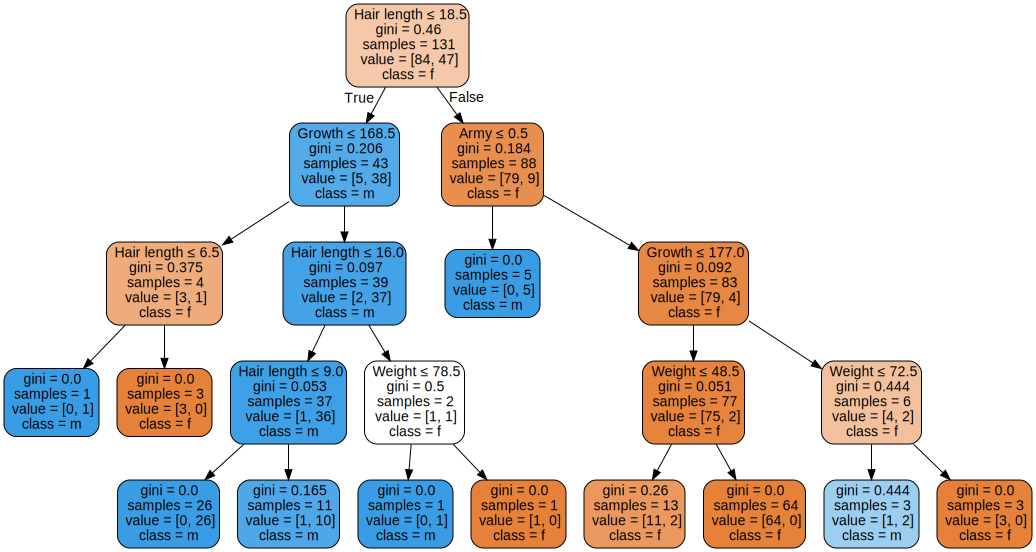

In [2983]:
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=['Growth','Weight','Hair length','Children number','Coin','Animal','Army'],  
                      class_names=['f', 'm'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [2984]:
df_test=pd.read_csv('data\students_test.csv')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number','Coin','Animal','Army']]
df_test_cut=df_test_cut.dropna()

In [2985]:
for name in ['Sex','Coin','Animal','Army']:
  coder.fit(df_test_cut[name])
  coder.fit(df_test_cut[name])
  df_test_cut[name]=coder.transform(df_test_cut[name])

In [2986]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']].values.reshape(-1,7))

c:\Users\kuche\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [2987]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,0,1
Predicted,,
0,40,0
1,2,26


In [2988]:
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([1.        , 0.92857143]),
 array([0.95238095, 1.        ]),
 array([0.97560976, 0.96296296]),
 array([42, 26], dtype=int64))

# Узнаем важность каждого признака в задаче предсказания пола человека

In [2989]:
from sklearn.ensemble import ExtraTreesClassifier

In [2990]:
coder = preprocessing.LabelEncoder()

In [2991]:
df_new = df.copy().dropna()

for name in ['Sex','Coin','Animal','Army','Glasses','Your rating in university',
             'Fastfood','Hostel','Chocolate','Brother-sister','Plane seat','Problems in last semester',
             'Rock paper scissors','Strange people','Your insitute']:
    coder.fit(df_new[name])
    df_new[name]=coder.transform(df_new[name])

In [2992]:
selector = ExtraTreesClassifier()
result = selector.fit(df_new[df_new.columns], df_new['Sex'])
result.feature_importances_

array([0.00398031, 0.05672429, 0.11539208, 0.00296897, 0.00393567,
       0.00364227, 0.00852781, 0.00390822, 0.01423751, 0.01170436,
       0.00145819, 0.00213233, 0.00405926, 0.00157121, 0.00706644,
       0.00115203, 0.00353656, 0.00298507, 0.00675333, 0.00461427,
       0.00483188, 0.0083791 , 0.00568105, 0.45882291, 0.00577378,
       0.01962797, 0.00094726, 0.00452046, 0.00222612, 0.00281983,
       0.00225479, 0.00627352, 0.00386391, 0.00640755, 0.09507288,
       0.00168919, 0.05605824, 0.00353517, 0.00529327, 0.00441624,
       0.00321353, 0.00210384, 0.0033327 , 0.00533194, 0.00591414,
       0.00357596, 0.01261676, 0.00506586])

In [2993]:
features_table= pd.DataFrame(result.feature_importances_, index =df.columns,
                                              columns =['importance'])
features_table.head()

,importance
Age,0.003980
Growth,0.056724
Shoe size,0.115392
Course number,0.002969
Year of birth,0.003936


In [2994]:
features_table.sort_values(by='importance', ascending=False)

,importance
Sex,0.458823
Shoe size,0.115392
Army,0.095073
Growth,0.056724
Hair length,0.056058
Coin,0.019628
Physics rating,0.014238
Middle and ring finger,0.012617
Computer science rating,0.011704
Russian rating,0.008528


In [2995]:
df = pd.read_csv('data\students.csv')
df_cut = df[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut = df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 185
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Army                     157 non-null    object 
 1   Shoe size                157 non-null    int64  
 2   Hair length              157 non-null    float64
 3   Growth                   157 non-null    int64  
 4   Coin                     157 non-null    object 
 5   Computer science rating  157 non-null    int64  
 6   Weight                   157 non-null    float64
 7   Sex                      157 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ KB


# OneHot Кодирование

In [2996]:
df_cut = pd.get_dummies(df_cut, drop_first=True)
df_cut.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,40,50.0,170,84,64.0,True,False,False
1,43,7.0,191,72,73.0,True,False,True
2,41,4.0,172,0,60.0,False,True,True
3,38,20.0,168,0,59.0,True,True,False
4,36,55.0,159,0,57.0,True,False,False


In [2997]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(df_cut[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', \
                  'Computer science rating', 'Weight']].values.reshape(-1,7), y=df_cut['Sex_мужской'].values)

DecisionTreeClassifier(max_depth=3)

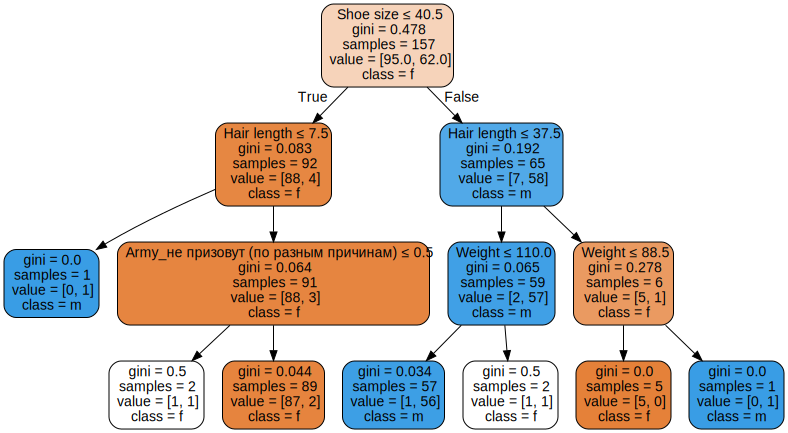

In [2998]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', 'Coin_Решка', 'Computer science rating', 'Weight'],  
                      class_names=['f', 'm'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [2999]:
df_test = pd.read_csv('data/students_test.csv')
df_cut_test = df_test[['Army','Shoe size', 'Hair length', 'Growth', 'Coin', 'Computer science rating', 'Weight','Sex']]
df_cut_test = df_cut_test.dropna()

In [3000]:
df_cut_test = pd.get_dummies(df_cut_test,drop_first=True)
df_cut_test.head()

,Shoe size,Hair length,Growth,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,44.0,1.2,180.0,88,78.0,True,False,True
1,38.0,30.0,167.0,0,50.0,True,False,False
2,41.0,50.0,178.0,0,70.0,True,False,False
3,35.0,20.0,156.0,0,47.0,True,False,False
4,44.0,8.0,186.0,0,94.0,False,False,True


In [3001]:
df_cut_test['Predicted'] = model.predict(df_cut_test[['Army_не призовут (по разным причинам)','Shoe size', 'Hair length', 'Growth', \
                                                      'Coin_Решка', 'Computer science rating', 'Weight']].values.reshape(-1,7))

Метрики качества задачи классификации

In [3002]:
pd.crosstab(df_cut_test['Predicted'],df_cut_test['Sex_мужской'])

Sex_мужской,False,True
Predicted,,
False,46,1
True,1,29


In [ ]:
# Задача

In [3003]:
coder = preprocessing.LabelEncoder()

In [3004]:
df_new = df.copy().dropna()

for name in ['Sex','Coin','Animal','Army','Glasses','Your rating in university',
             'Fastfood','Hostel','Chocolate','Brother-sister','Plane seat','Problems in last semester',
             'Rock paper scissors','Strange people','Your insitute']:
    coder.fit(df_new[name])
    df_new[name]=coder.transform(df_new[name])

In [3005]:
selector = ExtraTreesClassifier()
result = selector.fit(df_new[df_new.columns], df_new['Your insitute'])
result.feature_importances_

array([0.01420294, 0.01553375, 0.01831147, 0.01017915, 0.01009378,
       0.01535447, 0.01432581, 0.05849087, 0.00949939, 0.08247311,
       0.00919954, 0.0345953 , 0.0473059 , 0.01191899, 0.01446866,
       0.0218224 , 0.06061863, 0.01552553, 0.01203944, 0.01444829,
       0.00807566, 0.01266125, 0.01171501, 0.01612073, 0.00614397,
       0.01149785, 0.0108627 , 0.00985603, 0.01094779, 0.00503231,
       0.00831798, 0.01434169, 0.01662101, 0.01640074, 0.00825171,
       0.00546703, 0.01746851, 0.0114936 , 0.01264055, 0.01574089,
       0.01265768, 0.01472236, 0.20178373, 0.00724289, 0.0126009 ,
       0.01154517, 0.00976295, 0.00961987])

In [3006]:
features_table= pd.DataFrame(result.feature_importances_, index =df.columns,
                                              columns =['importance'])
features_table.head()

,importance
Age,0.014203
Growth,0.015534
Shoe size,0.018311
Course number,0.010179
Year of birth,0.010094


In [3007]:
features_table.sort_values(by='importance', ascending=False)

,importance
Your insitute,0.201784
Computer science rating,0.082473
Social science rating,0.060619
Maths rating,0.058491
History rating,0.047306
Literature rating,0.034595
Foreign language rating,0.021822
Shoe size,0.018311
Hair length,0.017469
Width of 5000 mm,0.016621
